In [1]:
import pandas as pd
from matplotlib import pyplot
import numpy as np
import os

In [2]:
file_location = r"D:/softwares/python_workspace/data/"
test_df = pd.read_csv(file_location + "test.csv", index_col='PassengerId')
train_df = pd.read_csv(file_location + "train.csv", index_col='PassengerId')

In [3]:
# handle missing values 
# 1. deletion
# 2. imputation - mean/median/mode imputation or, 
#  time series data use forward / time series data
test_df['Survived'] = -888
df = pd.concat((test_df, train_df), axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [6]:
df[df['Embarked'].isnull()]
# observe both missing items have survived

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [7]:
df.Embarked.value_counts()
# as per this Southampton is most common so you can use this

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [8]:
# lets observe which embarkment place has survived most
pd.crosstab((df[df['Survived']!=-888]).Embarked,(df[df['Survived']!=-888]).Survived)
# looks S

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [9]:
# lets observe fare 80 related data
df.groupby(['Pclass','Embarked']).Fare.median()
# now looks c

Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [10]:
# now to replace the misign value
df.Embarked.fillna('C', inplace=True)
# or
# df.loc[df.Embarked.isnull, 'Embarked'] = 'S'

In [11]:
# now lets check fare
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [12]:
df[(df['Embarked'] == 'S') & (df['Pclass'] == 3)].Fare.median()
# median imputation, we find mean fare for the missing data

8.05

In [13]:
df.Fare.fillna(8.05,inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


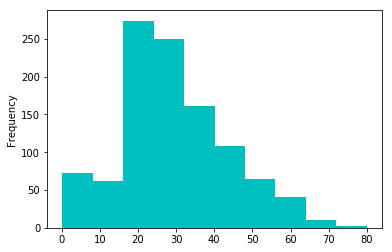

In [15]:
# more missing data then use histogram, here age data is missing for 200 odd entries
df.Age.plot(kind='hist', color='c')

In [16]:
df.Age.mean()

29.881137667304014

In [17]:
# can use to fill all mising by mean - 30, as stuff is in 0 and 80 there are extreme values which wil affect mean, so ignore
# usge gender information
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

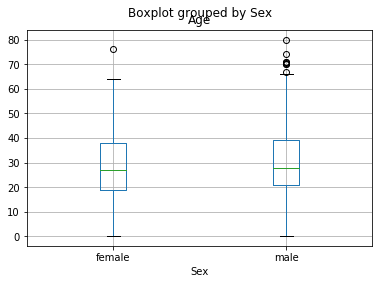

In [18]:
df[df['Age'].notnull()].boxplot('Age', 'Sex')

In [19]:
# to replace values using median genderwise then
# age_sex_median = df.groupby(['Sex']).Age.transform('median')
# df.Age.fillna(age_sex_median, inplace=True)

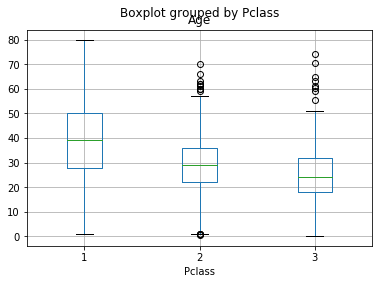

In [20]:
df[df['Age'].notnull()].boxplot('Age', 'Pclass')

In [21]:
# name and age can be related
def get_title(name):
    title_group = {'mr':'Mr','mrs':'Mrs','miss':'Miss','master':'Master','don':'Sir','dona':'Lady', 'rev':'Sir', 'dr':'Officer'
                  ,'mme':'Mrs', 'ms':'Mrs', 'major':'Officer', 'lady':'Lady', 'sir':'Sir', 'mlle':'Miss', 'col':'Officer',
                   'col':'Officer', 'capt':'Officer', 'the countess':'Lady', 'jonkheer':'Sir'}
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [22]:
# titles = df.Name.map(lambda x: get_title(x)).unique()
df['title'] = df.Name.apply(get_title)

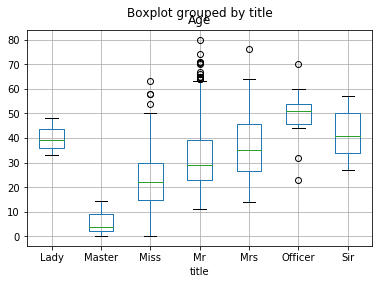

In [23]:
df[df.title.notnull()].boxplot('Age', 'title')

In [24]:
# use title to replace missing age values
age_title_median = df.groupby(['title']).Age.transform('median')
df.Age.fillna(age_title_median, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


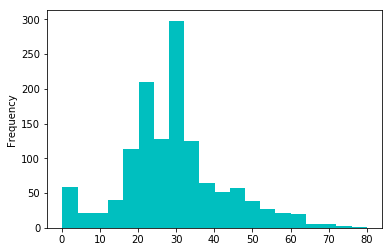

In [25]:
# outlier detection
# 1. histogram, box plot, scatter plot (for bivaRIATE distribution)

# how to resolve outliers
# 1. removal - not recommended
# 2. we can take log of data to reduce impact of outlier
# 3. binning
# 4. imputation
df.Age.plot(kind='hist', bins=20, color='c')

In [26]:
df[df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,title
PassengerId,,,,,,,,,,,,
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr


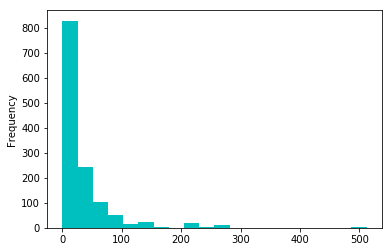

In [27]:
df.Fare.plot(kind='hist',color='c', bins=20)

In [28]:
df[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,title
PassengerId,,,,,,,,,,,,
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr


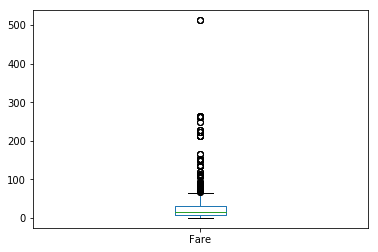

In [29]:
df.Fare.plot(kind='box')

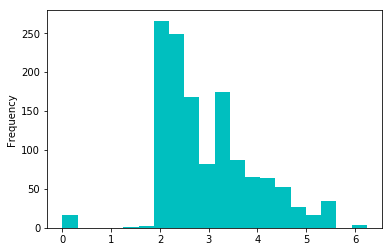

In [30]:
FareLog = np.log(df.Fare + 1.0) # since log of 0 is undefined
FareLog.plot(kind='hist', color='c', bins=20)

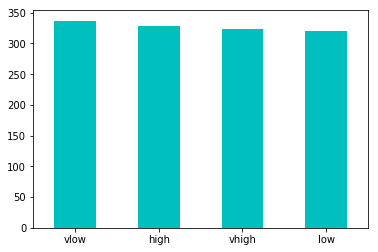

In [31]:
pd.qcut(df.Fare,4)
pd.qcut(df.Fare,4, labels=['vlow', 'low', 'high', 'vhigh'])
pd.qcut(df.Fare,4, labels=['vlow', 'low', 'high', 'vhigh']).value_counts().plot(kind='bar',color='c', rot=0)

In [32]:
df['Fare_bin']=pd.qcut(df.Fare,4, labels=['vlow', 'low', 'high', 'vhigh'])

In [ ]:
# FeatureEngineering